In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#read the data
df = pd.read_csv('train.csv')
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [24]:
df.shape

(595212, 59)

In [25]:
#checking the duplicates
df.drop_duplicates()
df.shape

(595212, 59)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [27]:
#Let's check if there are any null values, which are replaced by -1
missing_obs=[]
for i in df.columns:
    nulls = df[df[i]==-1][i].count()
    if nulls>0:
        missing_obs.append(i)
        nulls_perc = nulls/df.shape[0]
        
        print('{} has {} obs ({:.2%}) missing '.format(i,nulls,nulls_perc))

ps_ind_02_cat has 216 obs (0.04%) missing 
ps_ind_04_cat has 83 obs (0.01%) missing 
ps_ind_05_cat has 5809 obs (0.98%) missing 
ps_reg_03 has 107772 obs (18.11%) missing 
ps_car_01_cat has 107 obs (0.02%) missing 
ps_car_02_cat has 5 obs (0.00%) missing 
ps_car_03_cat has 411231 obs (69.09%) missing 
ps_car_05_cat has 266551 obs (44.78%) missing 
ps_car_07_cat has 11489 obs (1.93%) missing 
ps_car_09_cat has 569 obs (0.10%) missing 
ps_car_11 has 5 obs (0.00%) missing 
ps_car_12 has 1 obs (0.00%) missing 
ps_car_14 has 42620 obs (7.16%) missing 


In [28]:
##dropping columns with high missing values
df = df.drop(columns=['ps_car_03_cat','ps_car_05_cat'],axis=1)
df.shape

(595212, 57)

In [29]:
##Imputing with mean or mode 
from sklearn. impute import SimpleImputer
mean_imputation = SimpleImputer(missing_values=-1,strategy='mean')
mode_imputation = SimpleImputer(missing_values=-1,strategy='most_frequent')
df['ps_reg_03'] = mean_imputation.fit_transform(df[['ps_reg_03']]).ravel()
df['ps_car_12'] = mean_imputation.fit_transform(df[['ps_car_12']]).ravel()
df['ps_car_14'] = mean_imputation.fit_transform(df[['ps_car_14']]).ravel()
df['ps_car_11'] = mean_imputation.fit_transform(df[['ps_car_11']]).ravel()
df['ps_ind_02_cat'] = mode_imputation.fit_transform(df[['ps_ind_02_cat']]).ravel()
df['ps_ind_04_cat'] = mode_imputation.fit_transform(df[['ps_ind_04_cat']]).ravel()
df['ps_ind_05_cat'] = mode_imputation.fit_transform(df[['ps_ind_05_cat']]).ravel()
df['ps_car_01_cat'] = mode_imputation.fit_transform(df[['ps_car_01_cat']]).ravel()
df['ps_car_02_cat'] = mode_imputation.fit_transform(df[['ps_car_02_cat']]).ravel()
df['ps_car_07_cat'] = mode_imputation.fit_transform(df[['ps_car_07_cat']]).ravel()
df['ps_car_09_cat'] = mode_imputation.fit_transform(df[['ps_car_09_cat']]).ravel()

In [30]:
##Checking out the cardinality of the categorical variables
cols_with_cardinality = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_02_cat','ps_car_04_cat',
                         'ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat']
for i in cols_with_cardinality:
    unique_categories = df[i].value_counts().shape[0]
    print('{} has {} unique values'.format(i,unique_categories))

ps_ind_02_cat has 4 unique values
ps_ind_04_cat has 2 unique values
ps_ind_05_cat has 7 unique values
ps_car_01_cat has 12 unique values
ps_car_02_cat has 2 unique values
ps_car_04_cat has 10 unique values
ps_car_06_cat has 18 unique values
ps_car_07_cat has 2 unique values
ps_car_08_cat has 2 unique values
ps_car_09_cat has 5 unique values
ps_car_10_cat has 3 unique values
ps_car_11_cat has 104 unique values


### Exploratory Data Analysis

In [31]:
df.shape

(595212, 57)

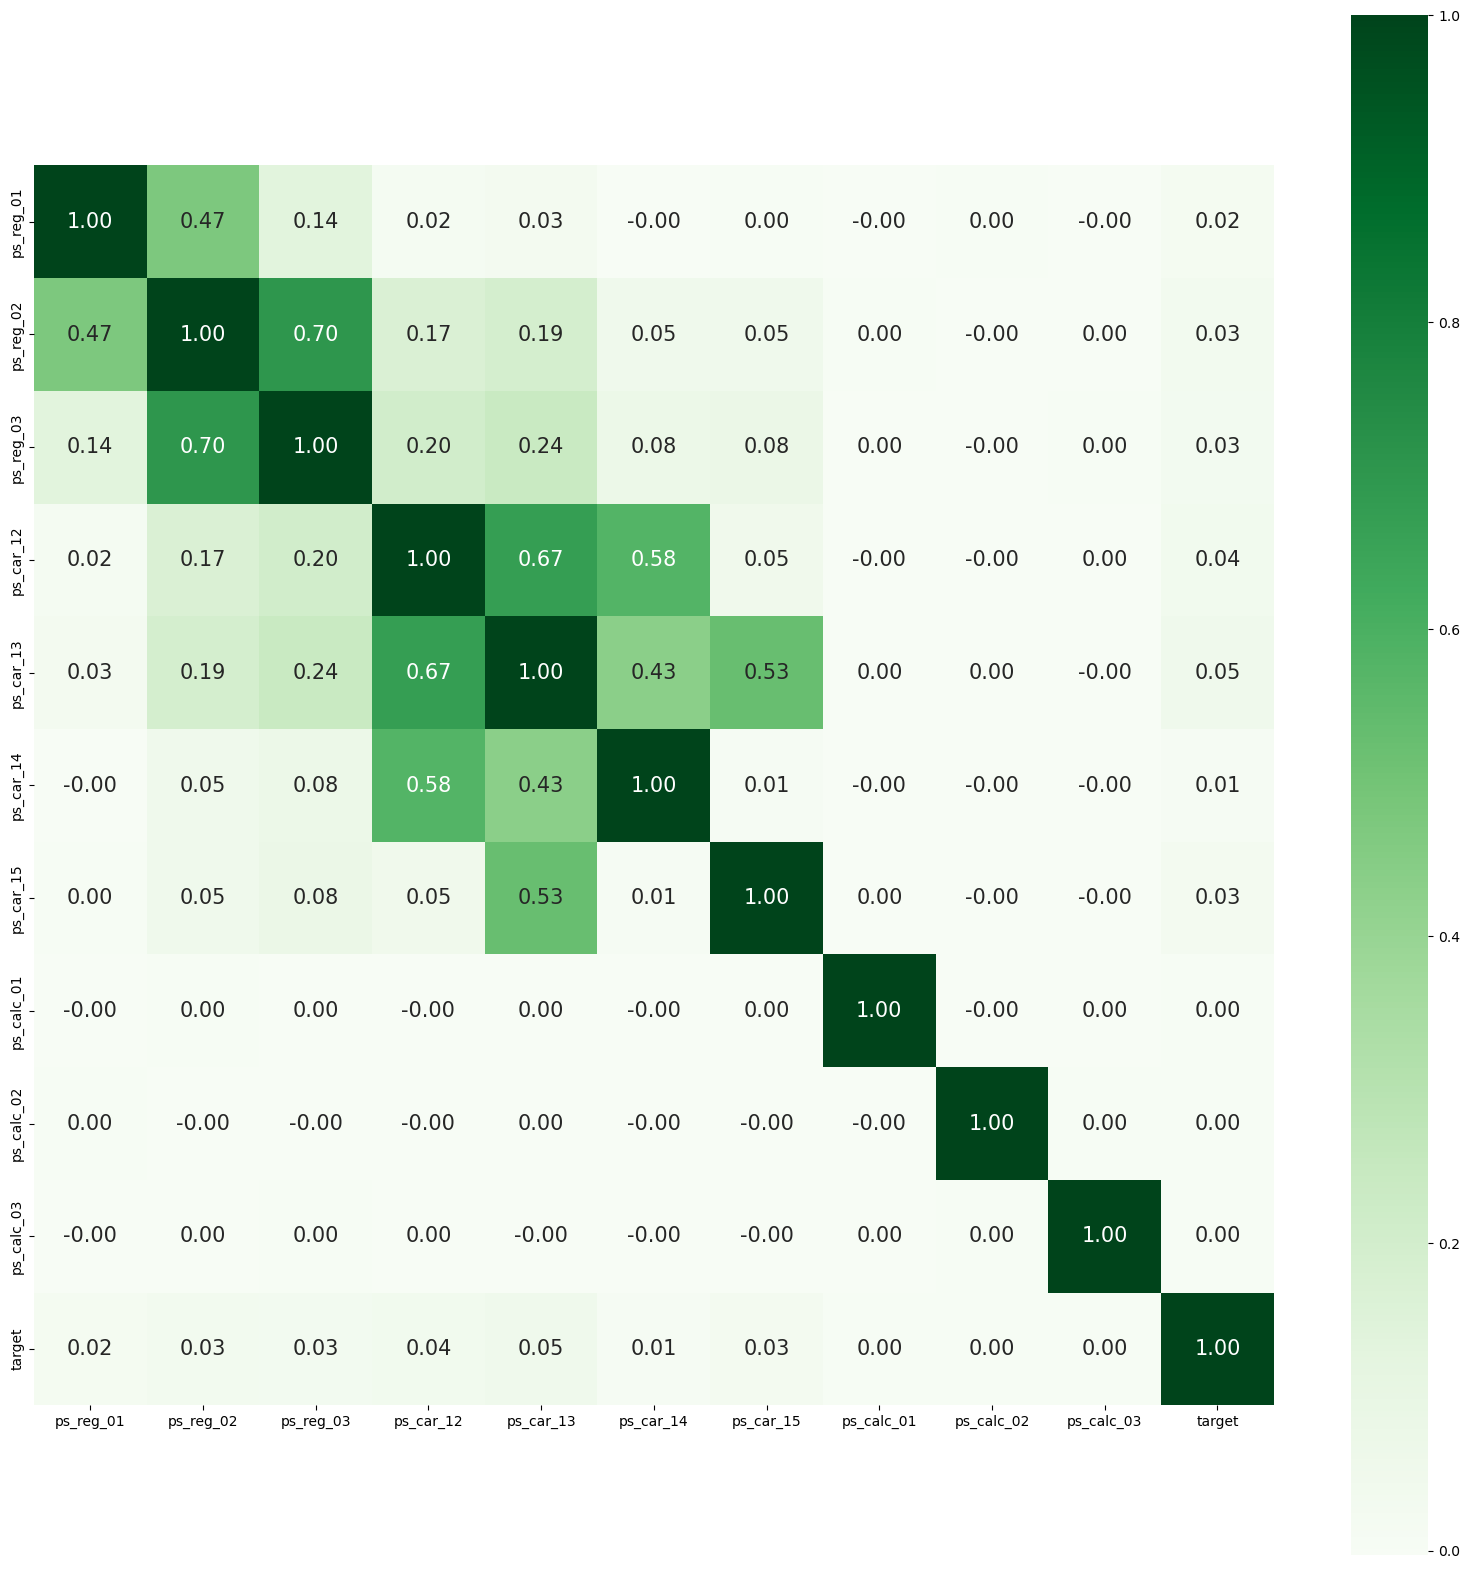

In [33]:
#check correlation of continuous vars with target
conti_cols = ['ps_reg_01','ps_reg_02','ps_reg_03','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02',
     'ps_calc_03','target']

#Finding out the correlation between the features
conti_cols_corr = df[conti_cols].corr()

#Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(conti_cols_corr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':15}, cmap='Greens')
plt.show()

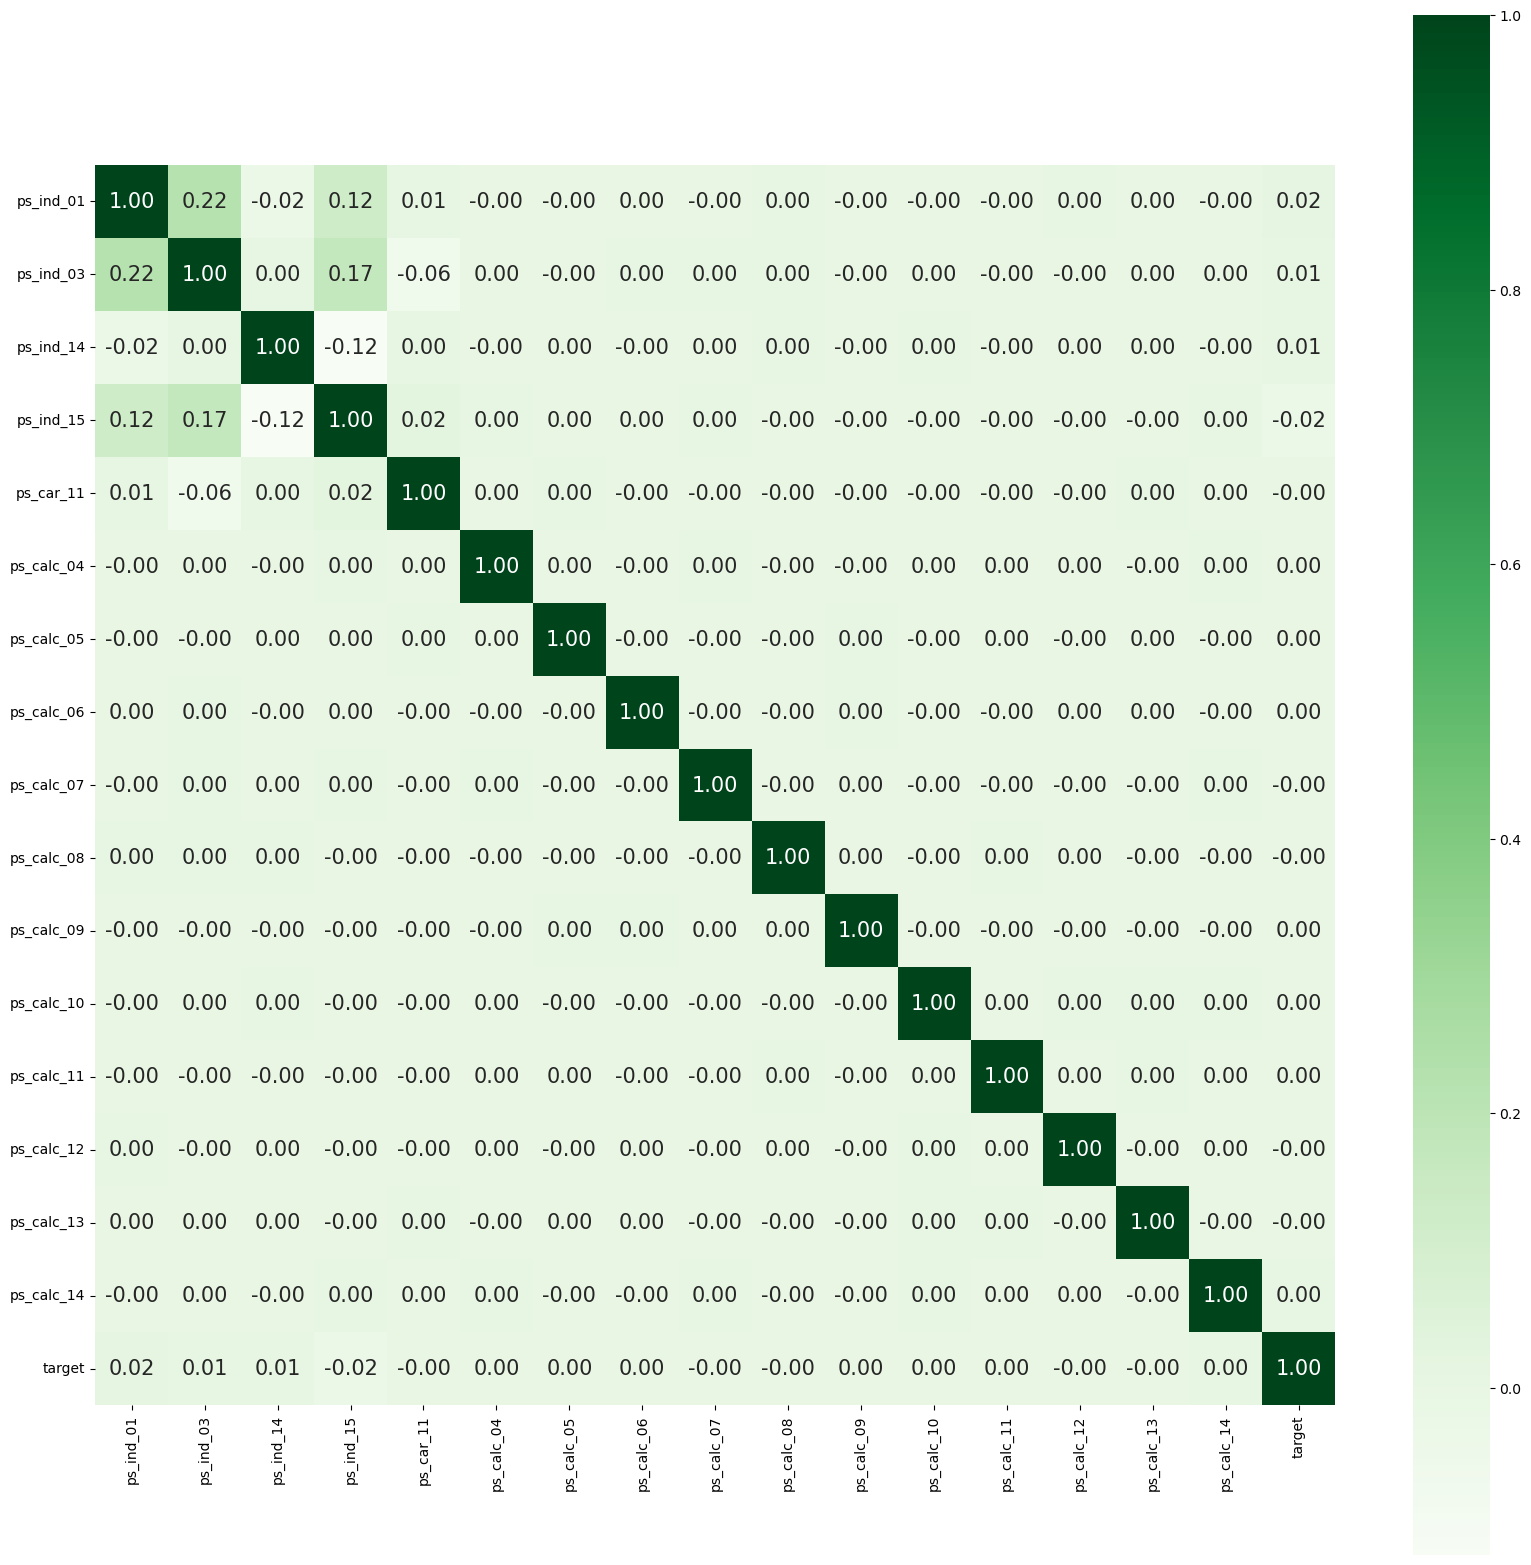

In [34]:
#Check correlation of ordinal vars with target 
ord_cols = ['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_car_11','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07',
     'ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','target']
#Finding out the correlation between the features 
ord_cols_corr = df[ord_cols].corr()

#Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(ord_cols_corr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':15}, cmap='Greens')
plt.show()

## Feature Engineering

In [41]:
# frequency encoding
cat = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_02_cat','ps_car_04_cat','ps_car_06_cat',
    'ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat']

df_freq = df
freq_enc = df_freq['ps_ind_02_cat'].value_counts()/len(df_freq)
df_freq['ps_ind_02_cat_freq'] = df_freq['ps_ind_02_cat'].map(freq_enc) 
df_freq.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_02_cat_freq
0,7,0,2,2,5,1,0,0,1,0,...,1,5,8,0,1,1,0,0,1,0.207612
1,9,0,1,1,7,0,0,0,0,1,...,1,1,9,0,1,1,0,1,0,0.725918
2,13,0,5,4,9,1,0,0,0,1,...,2,7,7,0,1,1,0,1,0,0.019116
3,16,0,0,1,2,0,0,1,0,0,...,2,4,9,0,0,0,0,0,0,0.725918
4,17,0,0,2,0,1,0,1,0,0,...,1,1,3,0,0,0,1,1,0,0.207612


In [42]:
## One-hot encoding
ohe_cols = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_02_cat','ps_car_04_cat','ps_car_06_cat',
    'ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat']

print('Before ohe we have {} features in train'.format(df.shape[1]))
df_ohe = pd.get_dummies(df,columns=ohe_cols,drop_first=True)
print('After ohe we have {} features in train'.format(df_ohe.shape[1]))

Before ohe we have 58 features in train
After ohe we have 205 features in train


In [43]:
#We will drop the column 'ps_car_11_cat' since there are 104 different categorical variables in it
ohe_cols_new = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_02_cat','ps_car_04_cat','ps_car_06_cat',
    'ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat']
print('Before ohe we have {} features in train'.format(df.shape[1]))
df = pd.get_dummies(df,columns=ohe_cols_new,drop_first=True)
print('After ohe we have {} features in train'.format(df.shape[1]))

Before ohe we have 58 features in train
After ohe we have 103 features in train


### Feature Selection

In [44]:
# removing irrelevant columns
cols_to_drop = ['ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08',
                'ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin',
                'ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin','ps_ind_02_cat_freq',
                'ps_car_11_cat']
df.drop(cols_to_drop,axis=1,inplace=True)
df.shape

(595212, 81)

In [45]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split
y = df.target
X = df.drop('target',axis=1)
X = X.drop('id',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=56)

In [46]:
#run random forest to get feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25).fit(X_train,y_train)

feats = X_train.columns

for feature in zip(feats,rf.feature_importances_):
    print(feature)

('ps_ind_01', 0.05118954580449022)
('ps_ind_03', 0.06434186540869143)
('ps_ind_06_bin', 0.00675348576224513)
('ps_ind_07_bin', 0.007405667748814442)
('ps_ind_08_bin', 0.007985190811854172)
('ps_ind_09_bin', 0.007518167121777154)
('ps_ind_10_bin', 0.00011166870429741566)
('ps_ind_11_bin', 0.00035673340754619154)
('ps_ind_12_bin', 0.0014406042323936272)
('ps_ind_13_bin', 0.0002577819160550023)
('ps_ind_14', 0.0018539191112386443)
('ps_ind_15', 0.0665386106201095)
('ps_ind_16_bin', 0.008279575273272765)
('ps_ind_17_bin', 0.0050077284488846225)
('ps_ind_18_bin', 0.006894378909969615)
('ps_reg_01', 0.049735031981957445)
('ps_reg_02', 0.06137910881872508)
('ps_reg_03', 0.10704667035922452)
('ps_car_11', 0.021399330997115103)
('ps_car_12', 0.037456297252167446)
('ps_car_13', 0.11613125678404074)
('ps_car_14', 0.07710644783067346)
('ps_car_15', 0.051173480646896384)
('ps_ind_02_cat_2', 0.01287532178549659)
('ps_ind_02_cat_3', 0.006262659501310978)
('ps_ind_02_cat_4', 0.003526253591329842)
('ps

In [47]:
cols_for_model = ['ps_ind_01','ps_ind_03','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_11','ps_car_12','ps_car_13',
                  'ps_car_14','ps_car_15','ps_ind_02_cat_2','ps_ind_04_cat_1','ps_car_01_cat_11','ps_car_06_cat_1',
                  'ps_car_06_cat_11','ps_car_09_cat_2','target']

In [48]:
df2 = df
df = df2[cols_for_model]
df.shape

(595212, 18)

In [49]:
df.columns

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02',
       'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_ind_02_cat_2', 'ps_ind_04_cat_1', 'ps_car_01_cat_11',
       'ps_car_06_cat_1', 'ps_car_06_cat_11', 'ps_car_09_cat_2', 'target'],
      dtype='object')

## Handling Imbalance Dataset

In [51]:
#Let's check the distribution of target variable
print(df.target.value_counts())
df.target.value_counts(normalize=True)*100

0    573518
1     21694
Name: target, dtype: int64


0    96.355248
1     3.644752
Name: target, dtype: float64

Text(0.5, 1.0, 'Class Distributions \n (0:No Claim || 1:Claim)')

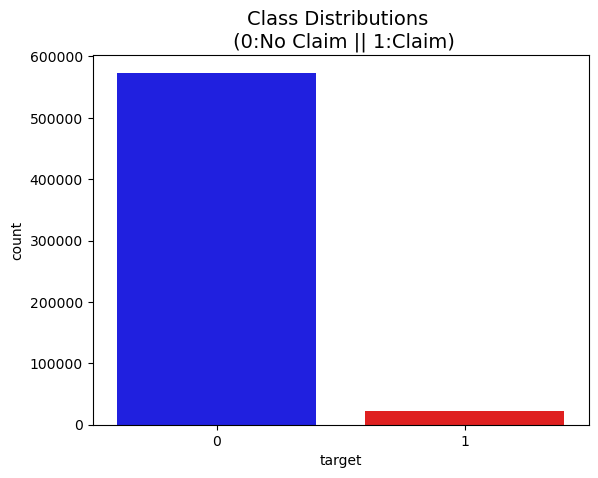

In [54]:
colors = ['blue','red']
sns.countplot(x = 'target',data=df,palette=colors)
plt.title('Class Distributions \n (0:No Claim || 1:Claim)',fontsize=14)

### Dealing with the imbalance problem

In [55]:
#Creating train and test sets
from sklearn.model_selection import train_test_split
y = df.target
X = df.drop('target',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=56)

In [56]:
print(y_train.value_counts())
y_train.value_counts(normalize=True).reset_index()

0    401462
1     15186
Name: target, dtype: int64


,index,target
0,0,0.963552
1,1,0.036448


In [57]:
print(y_test.value_counts())
y_test.value_counts(normalize=True).reset_index()

0    172056
1      6508
Name: target, dtype: int64


,index,target
0,0,0.963554
1,1,0.036446


In [58]:
import warnings
warnings.filterwarnings('ignore')

### Model building without handling the class imbalance

In [59]:
#Logistic regression
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score, f1_score

In [60]:
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

LogisticRegression()

In [61]:
y_pred = lreg.predict(X_test)

In [62]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9635536838332475
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.00      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[172056      0]
 [  6508      0]]


In [64]:
#installing library
!pip install imbalanced-learn

### Random Undersampling

In [65]:
#Random undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state=5)
X_resampled_us,y_resampled_us = under_sample.fit_resample(X_train,y_train)
len(X_resampled_us)

30372

In [68]:
len(y_resampled_us)

30372

In [70]:
y_resampled_us.value_counts()

0    15186
1    15186
Name: target, dtype: int64

In [74]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 15186), (1, 15186)]


In [75]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us,y_resampled_us)
y_pred_us = lreg_us.predict(X_test)

In [76]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.5961055979928765
F1 score:  0.08856424319781624
Recall:  0.5384142593730793
Precision:  0.04825050605196844

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.60      0.74    172056
           1       0.05      0.54      0.09      6508

    accuracy                           0.60    178564
   macro avg       0.51      0.57      0.41    178564
weighted avg       0.94      0.60      0.72    178564


 confussion matrix:
 [[102939  69117]
 [  3004   3504]]


### TomekLinks

In [78]:
# TomekLinks
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek,y_resampled_tomek = tomek_sample.fit_resample(X_train,y_train)
len(X_resampled_tomek)

409168

In [79]:
print(sorted(Counter(y_resampled_tomek).items()))

[(0, 393982), (1, 15186)]


In [81]:
lreg_tomek =LogisticRegression()
lreg_tomek.fit(X_resampled_tomek,y_resampled_tomek)

y_pred_tomek = lreg_tomek.predict(X_test)

In [82]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_tomek))
print ('Recall: ', recall_score(y_test, y_pred_tomek))
print ('Precision: ', precision_score(y_test, y_pred_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_tomek))

Accuracy:  0.9635536838332475
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.00      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[172056      0]
 [  6508      0]]


### Random Oversampling

In [84]:
#Random Oversampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy=1)
X_resampled_os,y_resampled_os = over_sample.fit_resample(X_train,y_train)
len(X_resampled_os)

802924

In [85]:
print(Counter(y_resampled_os))

Counter({0: 401462, 1: 401462})


In [88]:
Counter(y_train)

Counter({0: 401462, 1: 15186})

In [86]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os,y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [87]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.6042987388275353
F1 score:  0.08891868891353123
Recall:  0.5298094652735095
Precision:  0.04853193705486586

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.61      0.75    172056
           1       0.05      0.53      0.09      6508

    accuracy                           0.60    178564
   macro avg       0.51      0.57      0.42    178564
weighted avg       0.94      0.60      0.72    178564


 confussion matrix:
 [[104458  67598]
 [  3060   3448]]


### SMOTE

In [89]:
#SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45,k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train,y_train)
len(X_resampled_smt)

802924

In [90]:
Counter(y_resampled_smt)

Counter({0: 401462, 1: 401462})

In [92]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt,y_resampled_smt)
y_pred_smt = lreg_smt.predict(X_test)

In [93]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.5717781859725365
F1 score:  0.07801290166998252
Recall:  0.497080516287646
Precision:  0.04232797309851231

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.57      0.72    172056
           1       0.04      0.50      0.08      6508

    accuracy                           0.57    178564
   macro avg       0.51      0.54      0.40    178564
weighted avg       0.93      0.57      0.70    178564


 confussion matrix:
 [[98864 73192]
 [ 3273  3235]]


### ADASYN

In [94]:
#ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42,n_neighbors=5)
X_resampled_ada,y_resampled_ada = ada.fit_resample(X_train,y_train)
len(X_resampled_ada)

808204

In [95]:
Counter(y_resampled_ada)

Counter({0: 401462, 1: 406742})

In [96]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada,y_resampled_ada)
y_pred_ada = lreg_smt.predict(X_test)

In [97]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.5717781859725365
F1 score:  0.07801290166998252
Recall:  0.497080516287646
Precision:  0.04232797309851231

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.57      0.72    172056
           1       0.04      0.50      0.08      6508

    accuracy                           0.57    178564
   macro avg       0.51      0.54      0.40    178564
weighted avg       0.93      0.57      0.70    178564


 confussion matrix:
 [[98864 73192]
 [ 3273  3235]]


### SMOTE+TOMEK

In [98]:
#SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk,y_resampled_smt_tmk = smt_tmk.fit_resample(X_train,y_train)
len(X_resampled_smt_tmk)

802528

In [99]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk,y_resampled_smt_tmk)
y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [100]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.5732342465446563
F1 score:  0.07776742384819256
Recall:  0.493700061462815
Precision:  0.0422080054648398

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.58      0.72    172056
           1       0.04      0.49      0.08      6508

    accuracy                           0.57    178564
   macro avg       0.51      0.53      0.40    178564
weighted avg       0.93      0.57      0.70    178564


 confussion matrix:
 [[99146 72910]
 [ 3295  3213]]


## Decision Trees

In [101]:
#Decision Tree-Base
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)

In [102]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

Accuracy:  0.9187798212405636
F1 score:  0.050664397460234344
Recall:  0.05946527350952674
Precision:  0.04413274033527198

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172056
           1       0.04      0.06      0.05      6508

    accuracy                           0.92    178564
   macro avg       0.50      0.51      0.50    178564
weighted avg       0.93      0.92      0.92    178564


 confussion matrix:
 [[163674   8382]
 [  6121    387]]


In [103]:
#Decision Trees- Random UnderSampling
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampled_us,y_resampled_us)

y_pred_dtc_us = 
dtc_us.predict(X_test)

In [104]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))

Accuracy:  0.5219641137071303
F1 score:  0.07217391304347825
Recall:  0.510141364474493
Precision:  0.03883404295138727

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.52      0.68    172056
           1       0.04      0.51      0.07      6508

    accuracy                           0.52    178564
   macro avg       0.50      0.52      0.38    178564
weighted avg       0.93      0.52      0.66    178564


 confussion matrix:
 [[89884 82172]
 [ 3188  3320]]


In [105]:
## Decision Trees- Tomek Links
dtc_tomek = DecisionTreeClassifier(random_state=0)
dtc_tomek.fit(X_resampled_tomek,y_resampled_tomek)

y_pred_dtc_tomek = dtc_tomek.predict(X_test)

In [106]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_tomek))
print ('Recall: ', recall_score(y_test, y_pred_dtc_tomek))
print ('Precision: ', precision_score(y_test, y_pred_dtc_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_tomek))

Accuracy:  0.9181469949149884
F1 score:  0.04918032786885245
Recall:  0.05808236017209588
Precision:  0.042644404332129966

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172056
           1       0.04      0.06      0.05      6508

    accuracy                           0.92    178564
   macro avg       0.50      0.50      0.50    178564
weighted avg       0.93      0.92      0.92    178564


 confussion matrix:
 [[163570   8486]
 [  6130    378]]


In [107]:
#Decision Trees - Random Oversampling
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os,y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [108]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.9296330727358258
F1 score:  0.04412324077596045
Recall:  0.044560540872771975
Precision:  0.043694440259153235

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    172056
           1       0.04      0.04      0.04      6508

    accuracy                           0.93    178564
   macro avg       0.50      0.50      0.50    178564
weighted avg       0.93      0.93      0.93    178564


 confussion matrix:
 [[165709   6347]
 [  6218    290]]


In [111]:
## Decision Trees- SMOTE
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt,y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [112]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.9144396406890527
F1 score:  0.053876641070101566
Recall:  0.06684081130915796
Precision:  0.04512448132780083

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172056
           1       0.05      0.07      0.05      6508

    accuracy                           0.91    178564
   macro avg       0.50      0.51      0.50    178564
weighted avg       0.93      0.91      0.92    178564


 confussion matrix:
 [[162851   9205]
 [  6073    435]]


In [113]:
## Decision Trees -ADASYN
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada,y_resampled_ada)

y_dtc_pred_ada = dtc_ada.predict(X_test)

In [114]:
print ('Accuracy: ', accuracy_score(y_test, y_dtc_pred_ada))
print ('F1 score: ', f1_score(y_test, y_dtc_pred_ada))
print ('Recall: ', recall_score(y_test, y_dtc_pred_ada))
print ('Precision: ', precision_score(y_test, y_dtc_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_dtc_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_dtc_pred_ada))

Accuracy:  0.9147532537353554
F1 score:  0.051943198804185346
Recall:  0.06407498463429626
Precision:  0.043674067867616254

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172056
           1       0.04      0.06      0.05      6508

    accuracy                           0.91    178564
   macro avg       0.50      0.51      0.50    178564
weighted avg       0.93      0.91      0.92    178564


 confussion matrix:
 [[162925   9131]
 [  6091    417]]


In [115]:
## Smote+Tomek
dtc_smt_tmk = DecisionTreeClassifier(random_state=0)
dtc_smt_tmk.fit(X_resampled_smt_tmk,y_resampled_smt_tmk)

y_dtc_pred_smt_tmk = dtc_smt_tmk.predict(X_test)

In [116]:
print ('Accuracy: ', accuracy_score(y_test, y_dtc_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_dtc_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_dtc_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_dtc_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_dtc_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_dtc_pred_smt_tmk))

Accuracy:  0.9147756546672342
F1 score:  0.05348923995521831
Recall:  0.06607252612169637
Precision:  0.04493207941483804

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172056
           1       0.04      0.07      0.05      6508

    accuracy                           0.91    178564
   macro avg       0.50      0.51      0.50    178564
weighted avg       0.93      0.91      0.92    178564


 confussion matrix:
 [[162916   9140]
 [  6078    430]]


## Random Forests

In [117]:
#Random Forest-Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

In [118]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9635424833673081
F1 score:  0.0003071253071253071
Recall:  0.00015365703749231714
Precision:  0.25

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.25      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.61      0.50      0.49    178564
weighted avg       0.94      0.96      0.95    178564


 confussion matrix:
 [[172053      3]
 [  6507      1]]


In [119]:
#Random Forest- Random Undersampling
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us,y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [120]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))

Accuracy:  0.5803465424161645
F1 score:  0.08556750094573322
Recall:  0.5387215734480639
Precision:  0.04647463513567253

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.58      0.73    172056
           1       0.05      0.54      0.09      6508

    accuracy                           0.58    178564
   macro avg       0.51      0.56      0.41    178564
weighted avg       0.94      0.58      0.70    178564


 confussion matrix:
 [[100123  71933]
 [  3002   3506]]


In [121]:
##Random Forest-SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt,y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [122]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.9630944647297327
F1 score:  0.0024220405691795337
Recall:  0.001229256299938537
Precision:  0.08163265306122448

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.08      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.52      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[171966     90]
 [  6500      8]]


In [123]:
##Random Forest-Oversampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os,y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [124]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9634136780090051
F1 score:  0.0006119014838610983
Recall:  0.00030731407498463427
Precision:  0.06896551724137931

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.07      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.52      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[172029     27]
 [  6506      2]]


In [125]:
#Random Forest-ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada,y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [126]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9631392665934903
F1 score:  0.0018198362147406732
Recall:  0.0009219422249539029
Precision:  0.06976744186046512

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.07      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.52      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[171976     80]
 [  6502      6]]


In [127]:
#Random Forest- Smote+Tomek
rf_smt_tmk = RandomForestClassifier()
rf_smt_tmk.fit(X_resampled_smt_tmk,y_resampled_smt_tmk)

y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [128]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))

Accuracy:  0.963161667525369
F1 score:  0.0027289266221952697
Recall:  0.0013829133374308542
Precision:  0.10227272727272728

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.10      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.53      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[171977     79]
 [  6499      9]]
